In [75]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
OneHotEncoder([1,3])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values=[1, 3], sparse=True)

In [12]:
df = pd.read_csv('cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [13]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

In [14]:
df.shape

(1473, 10)

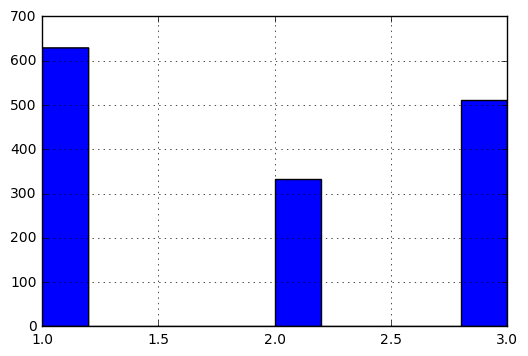

In [73]:
df.contraceptive.hist()

In [16]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [80]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = np.zeros((len(df),3))
y[np.arange(len(df)),df.contraceptive.values-1] = 1

liv_cats = df.living_standard.max()
edu_cats = df.Education.max()
liv = df.living_standard.values - 1
edu = df.Education.values - 1

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [88]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,4,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,4,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
model.add(Activation('relu'))
# model.add(Dense(output_dim=4))
# model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, nb_epoch=100, verbose=2)

Epoch 1/100
0s - loss: 0.9696 - acc: 0.5087
Epoch 2/100
0s - loss: 0.9696 - acc: 0.5094
Epoch 3/100
0s - loss: 0.9696 - acc: 0.5102
Epoch 4/100
0s - loss: 0.9696 - acc: 0.5087
Epoch 5/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 6/100
0s - loss: 0.9696 - acc: 0.5087
Epoch 7/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 8/100
0s - loss: 0.9696 - acc: 0.5072
Epoch 9/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 10/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 11/100
0s - loss: 0.9696 - acc: 0.5087
Epoch 12/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 13/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 14/100
0s - loss: 0.9696 - acc: 0.5087
Epoch 15/100
0s - loss: 0.9696 - acc: 0.5094
Epoch 16/100
0s - loss: 0.9696 - acc: 0.5079
Epoch 17/100
0s - loss: 0.9695 - acc: 0.5064
Epoch 18/100
0s - loss: 0.9695 - acc: 0.5072
Epoch 19/100
0s - loss: 0.9695 - acc: 0.5079
Epoch 20/100
0s - loss: 0.9695 - acc: 0.5072
Epoch 21/100
0s - loss: 0.9695 - acc: 0.5079
Epoch 22/100
0s - loss: 0.9695 - acc: 0.5079
Epoch 23/100
0s - l

In [97]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s


[0.94144469499588013, 0.49324324727058411]

In [54]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_10 (Embedding)         (None, 1, 4)          16                                           
____________________________________________________________________________________________________
flatten_10 (Flatten)             (None, 4)             0                                            
____________________________________________________________________________________________________
embedding_11 (Embedding)         (None, 1, 4)          16                                           
____________________________________________________________________________________________________
flatten_11 (Flatten)             (None, 4)             0                                            
___________________________________________________________________________________________

In [64]:
model = Sequential()
model.add(Dense(4, input_dim=x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(output_dim=1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100)

Epoch 1/100
1325/1325 [==============================] - 0s - loss: 0.6720 - acc: 0.2453     
Epoch 2/100
1325/1325 [==============================] - 0s - loss: -0.7079 - acc: 0.4264     
Epoch 3/100
1325/1325 [==============================] - 0s - loss: -1.7836 - acc: 0.4264     
Epoch 4/100
1325/1325 [==============================] - 0s - loss: -2.7790 - acc: 0.4264     
Epoch 5/100
1325/1325 [==============================] - 0s - loss: -3.7540 - acc: 0.4264     
Epoch 6/100
1325/1325 [==============================] - 0s - loss: -4.7403 - acc: 0.4264     
Epoch 7/100
1325/1325 [==============================] - 0s - loss: -5.7370 - acc: 0.4264     
Epoch 8/100
1325/1325 [==============================] - 0s - loss: -6.7459 - acc: 0.4264     
Epoch 9/100
1325/1325 [==============================] - 0s - loss: -7.7802 - acc: 0.4264     
Epoch 10/100
1325/1325 [==============================] - 0s - loss: -8.8112 - acc: 0.4264     
Epoch 11/100
1325/1325 [==========================

In [95]:
model.fit?